<a href="https://colab.research.google.com/github/imnamnngom/leftthings/blob/main/6%EC%A3%BC%EC%B0%A8_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

In [2]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #표준화 너무 오차가 크면 작은 숫자는 버려짐.

In [3]:
y = red_wine['quality']
x = red_wine.drop(columns = 'quality')

In [4]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) #다른 모델 사용시 일관성을 주기위한 rmadaom_state

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) #여기는 fit이 왜 없냐 

In [7]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
#knn
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [9]:
 from tensorflow import keras
 from tensorflow.keras import layers, callbacks

 early_stopping = callbacks.EarlyStopping(
     min_delta=0.001, # minimium amount of change to count as an improvement
     patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
 )

In [10]:
model.compile(
    optimizer='adam', #sgd,rmsprop
    loss='mae',
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [12]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=300,
    callbacks=[early_stopping],
    verbose=0,
)

Minimum Validation Loss: 0.4449


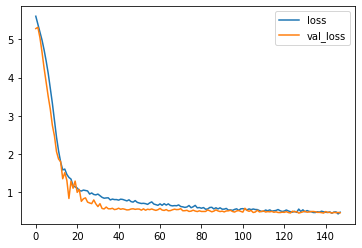

In [13]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [14]:
#dnn예측값
dnn_pred=model.predict(x_test)

In [15]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
red_wine = pd.read_csv('winequality-red.csv')

In [18]:
target = red_wine['quality']
features = red_wine.drop('quality', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [20]:
rms_error = []

for K in range (1, 76):
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(X_train, Y_train)
  pred = model.predict (X_test)
  error = mean_squared_error(Y_test, pred, squared=False)
  rms_error.append(error)

In [21]:
x = np.linspace(1,75, num = 75)
y = rms_error

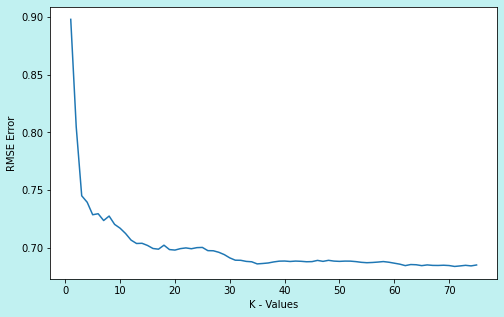

In [22]:
fig, ax = plt.subplots(figsize=(8, 5), facecolor="#c1f1f1")
ax.plot(x, y)

#annot_optimum(x, y)
plt.xlabel('K - Values')
plt.ylabel('RMSE Error')
plt.show ( )


In [23]:
#knn예측값
knn_model=model.predict(X_test)


In [24]:
#making the predictions dnn예측값
#dnn_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
#getting our results
dnn_mae = mean_absolute_error(y_test,dnn_pred)

In [27]:
#printing mae
print("MAE =",(round(dnn_mae,2)))

MAE = 0.44


In [28]:
knn_mae=mean_absolute_error(Y_test,knn_model) #knn_mae 는 knn mae값
print("mse =",(round(knn_mae,2)))

mse = 0.53


In [29]:
#result table
from tabulate import tabulate

In [30]:
#gathering the results
result_table = [['Deep Learning', round(dnn_mae,2)],['KNN',round(knn_mae,2)]]

#defining header names
col_names = ["Model", "MAE"]

#creating a results table
print(tabulate(result_table, headers=col_names))

Model            MAE
-------------  -----
Deep Learning   0.44
KNN             0.53
